In [1]:
import os
import json
from fabrictestbed.slice_manager import SliceManager, Status

In [2]:
credmgr_host = os.environ['FABRIC_CREDMGR_HOST']
orchestrator_host = os.environ['FABRIC_ORCHESTRATOR_HOST']
print(f"CM Host: {credmgr_host} Orchestrator Host: {orchestrator_host}")

CM Host: beta-2.fabric-testbed.net Orchestrator Host: beta-7.fabric-testbed.net


In [3]:
# create and initialize the slice manager

slice_manager = SliceManager(oc_host = orchestrator_host, cm_host = credmgr_host, project_name = 'all', scope = 'all')
slice_manager.initialize()

In [6]:
status, advertised_topology = slice_manager.resources()

print(f"Status: {status}")
if status == Status.OK:
    print(f"Topology: {advertised_topology}")
else:
    print(f"Error: {advertised_topology}")

Status: Status.OK
Topology: UKY: { cpu: 6/6 , core: 188/192 , ram: 1,524/1,536 G, disk: 9,580/9,600 G, unit: 3/3 }
	Components:
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		NVME-P4510:  NVME P4510 { disk: 9,000/10,000 G, unit: 9/10 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 379/381 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
	Site Interfaces:
		UKY_LBNL: TrunkPort { bw: 100/100 Gbps}
RENC
	Components:
	Site Interfaces:
STAR
	Components:
	Site Interfaces:
LBNL: { cpu: 6/6 , core: 184/192 , ram: 1,510/1,536 G, disk: 9,550/9,600 G, unit: 3/3 }
	Components:
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 1/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 1/2 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 380/381 }
		NVME-P4510:  NVME P4510 { disk: 8,000/10,000 G, unit: 8/10 }
		GPU-RTX6000:  GPU RTX

NameError: name '__list_network_services' is not defined

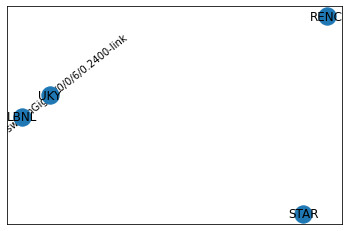

In [5]:
if status == Status.OK:
    advertised_topology.draw()

In [6]:
from fabrictestbed.slice_editor import ExperimentTopology, Capacities, ComponentType, ComponentModelType, ServiceType
# Create topology
t = ExperimentTopology()

# Add node
n1 = t.add_node(name='n1', site='UKY')

# Set capacities
cap = Capacities()
cap.set_fields(core=2, ram=6, disk=10)

# Set Properties
n1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Add PCI devices
n1.add_component(ctype=ComponentType.NVME, model='P4510', name='c1')

# Add node
n2 = t.add_node(name='n2', site='LBNL')

# Set properties
n2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')


# Add node
n3 = t.add_node(name='n3', site='LBNL')

# Set properties
n3.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Shared Cards
n1.add_component(model_type=ComponentModelType.SmartNIC_ConnectX_6, name='n1-nic1')
n2.add_component(model_type=ComponentModelType.SmartNIC_ConnectX_6, name='n2-nic1')
n3.add_component(model_type=ComponentModelType.SmartNIC_ConnectX_6, name='n3-nic1')

# L2STS Service
t.add_network_service(name='sts1', nstype=ServiceType.L2STS,
                      interfaces=[n1.interface_list[0], n2.interface_list[0], n3.interface_list[0]])

# Generate Slice Graph
slice_graph = t.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='Slice-sts-ded', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")

Response Status Status.OK
Reservations created [{
    "graph_node_id": "b784b3de-acbc-4bc7-b8c0-dca55196ece0",
    "lease_end": "2021-07-30 14:42:39",
    "pending_state": "None_",
    "reservation_id": "453edf87-34fa-4b93-bbad-a34fb58fb03e",
    "reservation_state": "Unknown",
    "slice_id": "e11a82ae-bcf1-44a9-86bf-ab4980119385"
}, {
    "graph_node_id": "3a86244b-0948-469b-9db9-1916a764b063",
    "lease_end": "2021-07-30 14:42:39",
    "pending_state": "None_",
    "reservation_id": "1eed6744-655f-43a5-8f4e-bd283204ccef",
    "reservation_state": "Unknown",
    "slice_id": "e11a82ae-bcf1-44a9-86bf-ab4980119385"
}, {
    "graph_node_id": "effae57b-9299-4abc-91ee-7e9c057576c8",
    "lease_end": "2021-07-30 14:42:39",
    "pending_state": "None_",
    "reservation_id": "e044c8eb-ce70-4335-8d08-42e1a15b7aeb",
    "reservation_state": "Unknown",
    "slice_id": "e11a82ae-bcf1-44a9-86bf-ab4980119385"
}, {
    "graph_node_id": "97336be3-62ef-4a64-ac02-9444eff9e3c8",
    "lease_end": "2021